In [257]:
data_path = "/Users/roseyu/Google Drive/UCSD/CSE151B/val/split_test/"
new_path = "/Users/roseyu/Google Drive/UCSD/CSE151B/new_val/"

# train:205942  val:3200 test: 36272 10HZ data
import numpy 
import pickle

In [321]:
import torch
from torch.utils.data import Dataset, DataLoader
import os, os.path 

class ArgoverseDataset(Dataset):
    def __init__(self, data_path: str, transform=None):
        super(ArgoverseDataset, self).__init__()
        self.data_path = data_path
        self.transform = transform

        self.pkl_list = glob(os.path.join(self.data_path, '*'))
        self.pkl_list.sort()
        
    def __len__(self):
        return len(self.pkl_list)

    def __getitem__(self, idx):

        pkl_path = self.pkl_list[idx]
        with open(pkl_path, 'rb') as f:
            data = pickle.load(f)
#         data = {k:v[0] for k, v in data.items()} the new format does not have this
        
        if self.transform:
            data = self.transform(data)

        return data



val_dataset  = ArgoverseDataset(data_path=new_path)
# def read_pkl_data(data_path: str, batch_size: int, 
#                   shuffle: bool=False, repeat: bool=False, **kwargs):
#     df = ArgoversePklLoader(data_path=data_path, shuffle=shuffle, **kwargs)
#     if repeat:
#         df = dataflow.RepeatedData(df, -1)
#     df = dataflow.BatchData(df, batch_size=batch_size, use_list=True)
#     df.reset_state()
#     return df 

3200
dict_keys(['city', 'lane', 'lane_norm', 'scene_idx', 'agent_id', 'car_mask', 'p_in', 'v_in', 'p_out', 'v_out', 'track_id'])
(60, 19, 2) (60, 30, 2)
(60, 30, 1)
00000000-0000-0000-0000-000000027906


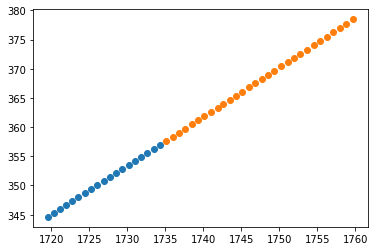

In [311]:
import matplotlib.pyplot as plt
print(len(val_dataset))

scene = val_dataset[0]
print(val_dataset[0].keys())

pos_in = scene["p_in"]
pos_out = scene["p_out"]
print(pos_in.shape, pos_out.shape)
track_id = scene["track_id"]
print(track_id.shape)
car_id  = 2
agent_id = scene["agent_id"]
print(agent_id)
plt.scatter(pos_in[car_id,:,0], pos_in[car_id,:,1])
plt.scatter(pos_out[car_id,:,0], pos_out[car_id,:,1])

In [326]:
batch_sz = 4
# collate lists of samples into batches.
def my_collate(batch):
    data = [scene['p_in'], scene['v_in'] for scene in batch]
    target = [scene['p_out'], scene['v_out'] for scene in batch]
    target = torch.LongTensor(target)
    return [data, target]

val_loader = DataLoader(val_dataset,batch_size=batch_sz, shuffle = True, collate_fn=my_collate, num_workers=0)
for i, batch in enumerate(val_loader):
    print(i)
    DataLoader[i]
    break
#     if not isinstance(val_dataset[i], dict):
#         print(i, len(val_dataset[i].keys()))

SyntaxError: invalid syntax (<ipython-input-326-7960bc37ada5>, line 4)

### Reformat the Argoverse data

In [253]:
import numpy 
pkl_list = glob(os.path.join(data_path, '*'))


def concate(key_header):
    out_seq = []
    for key in range(31):
        out_seq.append(data[key_header+str(key)])
    out = numpy.dstack(out_seq)
    pos = out.swapaxes(1,2)
    return pos
    
for pkl_path in pkl_list:
    with open(pkl_path, 'rb') as f:
        data = pickle.load(f)
    data = {k:v[0] for k, v in data.items()}
    new_data = {key:data[key] for key in ['city', 'lane', 'lane_norm', 'scene_idx', 'agent_id', 'car_mask', 'pos_2s', 'vel_2s']}
#     print((data.keys()))
#     print(new_data.keys())
    pos = concate("pos")
    vel = concate("vel")
    track_id = concate("track_id")
    track_id = track_id.swapaxes(0,2)
#     print(pos.shape)
#     print(vel.shape)
#     print(track_id.shape)
    new_data["pos"] = pos
    new_data["vel"] = vel
    new_data["track_id"] = track_id
#     print(new_data.keys())
    path, file = os.path.split(pkl_path)
   
    if not os.path.isdir(new_path):
        os.mkdir(new_path)
    with open(new_path+file, 'wb') as handle:
        pickle.dump(new_data, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [112]:
for i_batch, sample_batched in enumerate(val_loader):
    print(i_batch, type(sample_batched))

RuntimeError: stack expects each tensor to be equal size, but got [252, 3] at entry 0 and [216, 3] at entry 1

In [203]:
from tensorpack import dataflow
from glob import glob
import pickle
import os

file_name="12.pkl"
with open(path_name+file_name, 'rb') as f:
    data = pickle.load(f)
    print(data.keys())
    print(type(data))
#     data = {k:v[0] for k, v in data.items()}
#     print(type(data))
#     print((data.keys()))
  

dict_keys(['city', 'lane', 'lane_norm', 'scene_idx', 'agent_id', 'car_mask', 'pos_2s', 'vel_2s', 'pos', 'vel', 'track_id'])
<class 'dict'>


In [144]:
print((data['pos_2s']).shape)

(60, 18, 3)


In [152]:
print((data['track_id14']).shape)

(60,)
